# Imported the required libraries:
1. pandas: It is used to provide high-performance data structures and data analysis tools.
2. seaborn: Used to build statistical graphics.
3. pyplot: To plot the parameters in seaborn.
4. numpy: Use for math functions.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Problem Statement:
Use the loan.csv data to minimise the risk of losing money while lending to the customers by providing the consumer attributes and loan attributes to identify predictors of default.

In [3]:
loan = pd.read_csv("../data/loan.csv")

/var/folders/_h/0w6p3n5s1ws5vvyt7k4_21700000gn/T/ipykernel_52284/3914378986.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("../data/loan.csv")


# Understanding the data
Get the idea of data that whats columns are provided, types of vlaues, uderstading the meaning of those etc.

In [4]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
dtype: int64


<AxesSubplot:ylabel='None'>

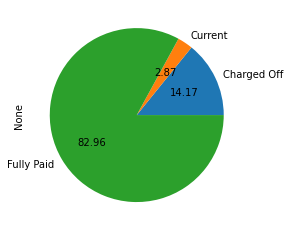

In [6]:
#Finding counts of unique loan_status values
print(loan.groupby('loan_status').size())
loan.groupby('loan_status').size().plot(kind='pie', autopct='%.2f')

purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
dtype: int64


<AxesSubplot:ylabel='None'>

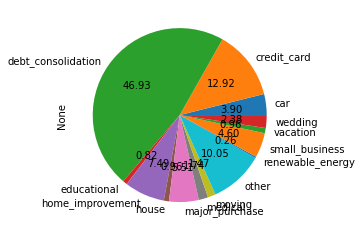

In [7]:
#Loan purpose percentages.
print(loan.groupby('purpose').size())
loan.groupby('purpose').size().plot(kind='pie', autopct='%.2f')

home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
dtype: int64


<AxesSubplot:ylabel='None'>

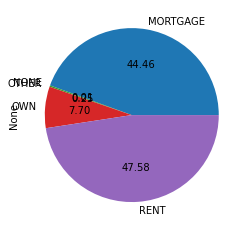

In [8]:
#Loan purpose percentages.
print(loan.groupby('home_ownership').size())
loan.groupby('home_ownership').size().plot(kind='pie', autopct='%.2f')

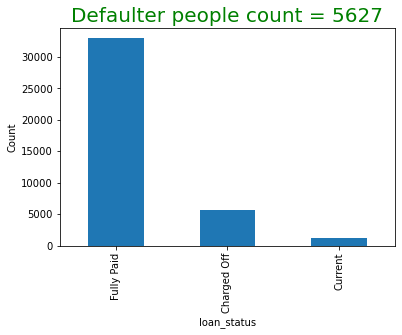

In [9]:
#defaults amount
defaulter=loan["loan_status"].value_counts()

loan["loan_status"].value_counts().plot.bar(xlabel="loan_status", ylabel="Count")
plt.title('Defaulter people count = '+str(defaulter[1]),fontdict={'fontsize':20,'fontweight':5,'color':'GREEN'})
plt.show()

## Some Findings:
- We should consider the data of only defaulter and fully paid customer. Ignore the data of current customer. 
- Around 82% people are paid fully loan. And around 14% customer are defaulter. So we need some balance here.
- Most of the people took loan for debt_consolidate. Around 46%. Then 13% people took loan for credit_card.
- We should consider some important variable which are available at the time of loan applications of new customer to provide some insits. Example: Loan_amt, Term, grade, home_ownership etc.
- Difference between the loan_amt, funded_amnt, funded_amt_inv.
- Meaning of the grade and sub_rade. Actually it is a quality score of the loan. It is caluclated based on credit history, quality of the collateral and chances of repayment.

# Data Cleaning
Find out the important variable. And remove the other columns which is not needed for this EDA.

In [10]:
# Initial Data
print(loan.info(max_cols=200))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [11]:
# removes the rows that contains NULL values
imp_clms = ["id", "member_id", "loan_amnt", "funded_amnt" , "funded_amnt_inv", "term", "int_rate", "grade", "sub_grade", "emp_length", "home_ownership", "annual_inc", "verification_status", "loan_status", "issue_d", "purpose", "total_pymnt"]
loan.drop(loan.columns.difference(imp_clms), 1, inplace=True)
print(print(loan.info(max_cols=200)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   grade                39717 non-null  object 
 8   sub_grade            39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

/var/folders/_h/0w6p3n5s1ws5vvyt7k4_21700000gn/T/ipykernel_52284/25678792.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  loan.drop(loan.columns.difference(imp_clms), 1, inplace=True)


In [12]:
#Finding missing values:
loan.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
total_pymnt               0
dtype: int64

In [154]:
loan.size

675189

In [13]:
# Need to remove the rows with loan_status as "Current"
print('Current Data Size: ', loan.size)
loan = loan[loan["loan_status"].apply(lambda x:False if x == "Current" else True)]
print('After removing the Current loan_status Size: ', loan.size)

Current Data Size:  675189
After removing the Current loan_status Size:  655809


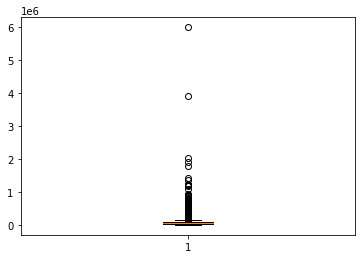

In [14]:
#Find some outliers
plt.boxplot(loan["annual_inc"])
plt.show()

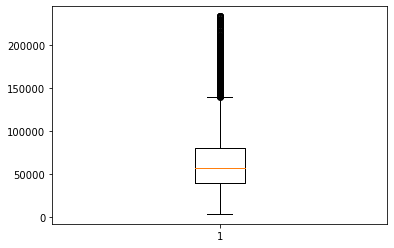

In [15]:
#Remove outliers
annual_inc_q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_q]
plt.boxplot(loan["annual_inc"])
plt.show()

## Summary results:
- Found out the below important variables for EDA.
    - Loan_amt, Interest rate, Term, Annual_income, grade, subgrade, emp_length, loan_data, home_ownership, verification_status, purpose_of_loan
- Deleted other columns.
- Deleted rows with null and NA values

# Univariate Analysis

In [32]:
sns.scatterplot(x="term", y="purpose", hue="loan_status", data=loan)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

# Bivariate Analysis

<AxesSubplot:xlabel='term', ylabel='purpose'>

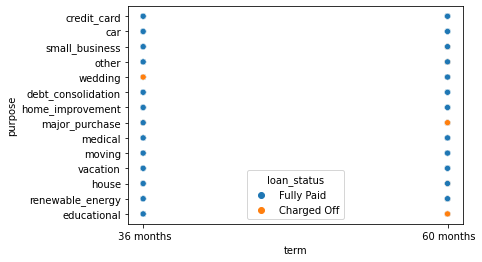

In [24]:
sns.scatterplot(x="term", y="purpose", hue="loan_status", data=loan)

<AxesSubplot:xlabel='grade', ylabel='purpose'>

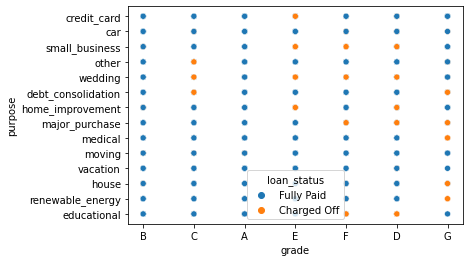

In [25]:
sns.scatterplot(x="grade", y="purpose", hue="loan_status", data=loan)

# Final Insigt

After all the EDA process we found that the below variables are can help to predict the defaulter
1. Term
2. Interest rate
3. Grade
4. Purpose of loan
5. Annual income